# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "schaetzwert_bp_sys", "schaetzwert_by_dia"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   terminal             14831 non-null  object 
 1   bundesland           14831 non-null  object 
 2   befinden             14831 non-null  object 
 3   geschlecht           14831 non-null  object 
 4   raucher              14831 non-null  object 
 5   blutzucker_bekannt   14831 non-null  object 
 6   cholesterin_bekannt  14831 non-null  object 
 7   in_behandlung        14831 non-null  object 
 8   messwert_bp_sys      14831 non-null  float64
 9   messwert_bp_dia      14831 non-null  float64
 10  age                  14831 non-null  int32  
 11  month                14831 non-null  int32  
 12  hour                 14831 non-null  int32  
 13  day                  14831 non-null  int32  
 14  temp                 14831 non-null  float64
 15  humidity             14831 non-null 

In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
encoded_test_set.columns

Index(['terminal_2', 'terminal_3a', 'terminal_3b', 'bundesland_Kärnten',
       'bundesland_Niederösterreich', 'bundesland_Oberösterreich',
       'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol',
       'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable',
       'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m',
       'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True',
       'in_behandlung_True', 'messwert_bp_sys', 'messwert_bp_dia', 'age',
       'month', 'hour', 'day', 'temp', 'humidity', 'temp_min', 'temp_max'],
      dtype='object')

In [8]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['terminal', 'bundesland', 'befinden', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'messwert_bp_sys', 'messwert_bp_dia', 'age', 'month', 'hour', 'day',
       'temp', 'humidity', 'temp_min', 'temp_max'],
      dtype='object')


### Models for Diastolic as target

In [9]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

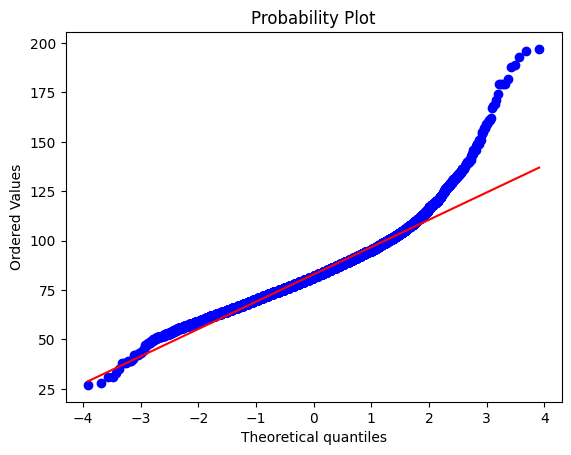

In [10]:
generate_qq_plot(data_df[target_dia])

Base Model

In [11]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     304.4
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        18:49:34   Log-Likelihood:                -38956.
No. Observations:               10381   AIC:                         7.797e+04
Df Residuals:                   10350   BIC:                         7.820e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      26.0262      2.136     12.187      0.000      21.840      30.212
terminal_2                      1.8276      0.245      7.456      0.000       1.347       2.308
terminal_3a                    -1.2640      0.401     -3.154      0.002      -2.050      -0.478
terminal_3b                    -0.3386      0.287     -1.181      0.237      -0.901       0.223
bundesland_Kärnten             -1.2178      1.456     -0.836      0.403      -4.072       1.636
bundesland_Niederösterreich    -0.9734      1.300     -0.749      0.454      -3.522       1.575
bundesland_Oberösterreich      -2.4861      1.436     -1.731      0.083      -5.301       0.329
bundesland_Salzburg            -1.6790      1.793     -0.937      0.349      -5.193       1.835
bundesland_Steiermark          -1.0891      1.162     -0.937      0.349      -3.367       1.189
bundesland_Tirol               -0.2784      1.855     -0.150      0.881      -3.914       3.357
bundesland_Vorarlberg           0.2043      2.451      0.083      0.934      -4.600       5.009
bundesland_Wien                -0.1171      1.286     -0.091      0.927      -2.637       2.403
bundesland_not_applicable      -1.7818      1.397     -1.276      0.202      -4.519       0.956
befinden_2                     -0.6128      0.229     -2.673      0.008      -1.062      -0.163
befinden_3                     -0.5423      0.327     -1.660      0.097      -1.183       0.098
befinden_4                      0.6051      0.925      0.654      0.513      -1.208       2.419
befinden_5                      4.6722      1.670      2.797      0.005       1.398       7.946
geschlecht_m                    1.2121      0.208      5.834      0.000       0.805       1.619
raucher_True                    0.6494      0.283      2.298      0.022       0.096       1.203
blutzucker_bekannt_True        -0.1925      0.286     -0.672      0.502      -0.754       0.369
cholesterin_bekannt_True        0.1666      0.266      0.627      0.531      -0.354       0.688
in_behandlung_True             -1.6254      0.327     -4.971      0.000      -2.266      -0.984
messwert_bp_sys                 0.5225      0.006     90.419      0.000       0.511       0.534
age                            -0.0802      0.007    -10.974      0.000      -0.094      -0.066
month                          -0.7998      0.076    -10.484      0.000      -0.949      -0.650
hour                           -0.0737      0.046     -1.607      0.108      -0.164       0.016
day                            -0.0627      0.012     -5.209      0.000      -0.086      -0.039
temp                            0.4083      0.147      2.776      0.006       0.120       0.697
humidity                        0.0420      0.015      2.881      0.004       0.013       0.071
temp_min   

In [12]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      26.0262  &        2.136     &    12.187  &         0.000        &       21.840    &       30.212     \\
\textbf{terminal\_2}                  &       1.8276  &        0.245     &     7.456  &         0.000        &        1.347    &        2.308     \\
\textbf{terminal\_3a}                 &      -1.2640  &        0.401     &    -3.154  &         0.002        &       -2.050    &       -0.478     \\
\textbf{terminal\_3b}                 &      -0.3386  &        0.287     &    -1.181  &         0.237        &       -0.901    &        0.223     \\
\textbf{bundesland\_Kärnten}          &      -1.2178  &        1.456     &    -0.836  &         0.403        &       -4.072    &        1.636     \\
\textbf{bundesland\_Niederösterreich} &      -0.9

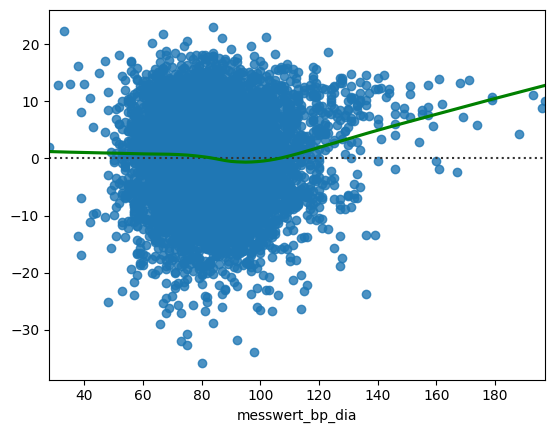

In [13]:
generate_residual_plot(Y_train_dia, model_base_dia)

Best Subset

In [14]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, train_results_best_dia, test_results_best_dia  = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['terminal_2', 'terminal_3a', 'terminal_3b', 'bundesland_Kärnten', 'bundesland_Niederösterreich', 'bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_sys', 'age', 'month', 'hour', 'day', 'temp', 'humidity', 'temp_min', 'temp_max']
Train Results:  {'r_2': 0.46876383730719406, 'adjusted_r_2': 0.4672240223428671, 'mse': 106.41723395946194}
Test Results:  {'r_2': 0.4592887731205142, 'adjusted_r_2': 0.4556179569163086, 'mse': 109.57904708540111}


In [15]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     304.4
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        18:49:53   Log-Likelihood:                -38956.
No. Observations:               10381   AIC:                         7.797e+04
Df Residuals:                   10350   BIC:                         7.820e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      26.0262      2.136     12.187      0.000      21.840      30.212
terminal_2                      1.8276      0.245      7.456      0.000       1.347       2.308
terminal_3a                    -1.2640      0.401     -3.154      0.002      -2.050      -0.478
terminal_3b                    -0.3386      0.287     -1.181      0.237      -0.901       0.223
bundesland_Kärnten             -1.2178      1.456     -0.836      0.403      -4.072       1.636
bundesland_Niederösterreich    -0.9734      1.300     -0.749      0.454      -3.522       1.575
bundesland_Oberösterreich      -2.4861      1.436     -1.731      0.083      -5.301       0.329
bundesland_Salzburg            -1.6790      1.793     -0.937      0.349      -5.193       1.835
bundesland_Steiermark          -1.0891      1.162     -0.937      0.349      -3.367       1.189
bundesland_Tirol               -0.2784      1.855     -0.150      0.881      -3.914       3.357
bundesland_Vorarlberg           0.2043      2.451      0.083      0.934      -4.600       5.009
bundesland_Wien                -0.1171      1.286     -0.091      0.927      -2.637       2.403
bundesland_not_applicable      -1.7818      1.397     -1.276      0.202      -4.519       0.956
befinden_2                     -0.6128      0.229     -2.673      0.008      -1.062      -0.163
befinden_3                     -0.5423      0.327     -1.660      0.097      -1.183       0.098
befinden_4                      0.6051      0.925      0.654      0.513      -1.208       2.419
befinden_5                      4.6722      1.670      2.797      0.005       1.398       7.946
geschlecht_m                    1.2121      0.208      5.834      0.000       0.805       1.619
raucher_True                    0.6494      0.283      2.298      0.022       0.096       1.203
blutzucker_bekannt_True        -0.1925      0.286     -0.672      0.502      -0.754       0.369
cholesterin_bekannt_True        0.1666      0.266      0.627      0.531      -0.354       0.688
in_behandlung_True             -1.6254      0.327     -4.971      0.000      -2.266      -0.984
messwert_bp_sys                 0.5225      0.006     90.419      0.000       0.511       0.534
age                            -0.0802      0.007    -10.974      0.000      -0.094      -0.066
month                          -0.7998      0.076    -10.484      0.000      -0.949      -0.650
hour                           -0.0737      0.046     -1.607      0.108      -0.164       0.016
day                            -0.0627      0.012     -5.209      0.000      -0.086      -0.039
temp                            0.4083      0.147      2.776      0.006       0.120       0.697
humidity                        0.0420      0.015      2.881      0.004       0.013       0.071
temp_min   

In [16]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      26.0262  &        2.136     &    12.187  &         0.000        &       21.840    &       30.212     \\
\textbf{terminal\_2}                  &       1.8276  &        0.245     &     7.456  &         0.000        &        1.347    &        2.308     \\
\textbf{terminal\_3a}                 &      -1.2640  &        0.401     &    -3.154  &         0.002        &       -2.050    &       -0.478     \\
\textbf{terminal\_3b}                 &      -0.3386  &        0.287     &    -1.181  &         0.237        &       -0.901    &        0.223     \\
\textbf{bundesland\_Kärnten}          &      -1.2178  &        1.456     &    -0.836  &         0.403        &       -4.072    &        1.636     \\
\textbf{bundesland\_Niederösterreich} &      -0.9

In [17]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, test_results_best_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),106.417,109.579,0.469,0.459,0.467,0.456
1,LM (Best Subset),106.417,109.579,0.469,0.459,0.467,0.456


In [18]:
test_results_base_dia

{'r_2': 0.4592887731205142,
 'adjusted_r_2': 0.4556179569163086,
 'mse': 109.57904708540111}

In [19]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 106.417234 & 109.579047 & 0.468764 & 0.459289 & 0.467224 & 0.455618 \\
1 & LM (Best Subset) & 106.417234 & 109.579047 & 0.468764 & 0.459289 & 0.467224 & 0.455618 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [20]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

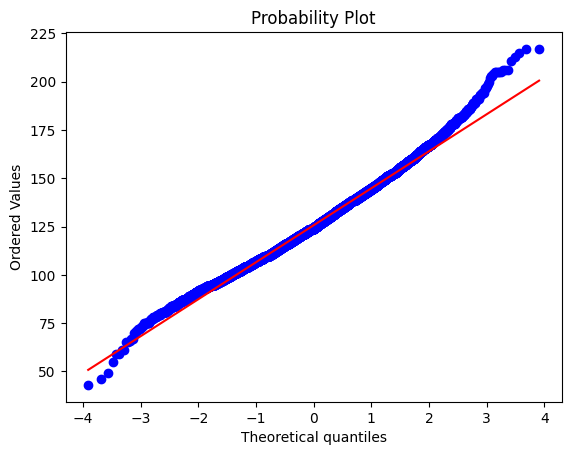

In [21]:
generate_qq_plot(data_df[target_sys])

Base Model

In [22]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     400.8
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        18:49:54   Log-Likelihood:                -41448.
No. Observations:               10381   AIC:                         8.296e+04
Df Residuals:                   10350   BIC:                         8.318e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      45.0035      2.699     16.677      0.000      39.714      50.293
terminal_2                     -3.2132      0.311    -10.336      0.000      -3.823      -2.604
terminal_3a                     0.3850      0.510      0.755      0.450      -0.614       1.384
terminal_3b                     1.8194      0.364      4.998      0.000       1.106       2.533
bundesland_Kärnten              0.9130      1.851      0.493      0.622      -2.716       4.542
bundesland_Niederösterreich     0.5294      1.653      0.320      0.749      -2.710       3.769
bundesland_Oberösterreich       1.7813      1.826      0.976      0.329      -1.798       5.361
bundesland_Salzburg            -1.2314      2.279     -0.540      0.589      -5.699       3.236
bundesland_Steiermark           0.5770      1.477      0.391      0.696      -2.319       3.473
bundesland_Tirol               -2.8701      2.358     -1.217      0.223      -7.491       1.751
bundesland_Vorarlberg          -3.0991      3.116     -0.995      0.320      -9.207       3.009
bundesland_Wien                -0.2240      1.635     -0.137      0.891      -3.428       2.980
bundesland_not_applicable       0.7396      1.776      0.416      0.677      -2.741       4.220
befinden_2                      0.5334      0.291      1.830      0.067      -0.038       1.105
befinden_3                      0.2204      0.415      0.531      0.596      -0.594       1.035
befinden_4                     -0.8226      1.176     -0.699      0.484      -3.128       1.483
befinden_5                     -0.7040      2.124     -0.331      0.740      -4.868       3.460
geschlecht_m                    1.6358      0.264      6.194      0.000       1.118       2.154
raucher_True                   -0.7735      0.359     -2.153      0.031      -1.478      -0.069
blutzucker_bekannt_True         0.9813      0.364      2.695      0.007       0.268       1.695
cholesterin_bekannt_True       -0.6195      0.338     -1.834      0.067      -1.282       0.043
in_behandlung_True              6.0776      0.412     14.754      0.000       5.270       6.885
messwert_bp_dia                 0.8446      0.009     90.419      0.000       0.826       0.863
age                             0.2363      0.009     26.107      0.000       0.219       0.254
month                           0.7599      0.097      7.817      0.000       0.569       0.950
hour                           -0.1019      0.058     -1.749      0.080      -0.216       0.012
day                             0.1069      0.015      6.996      0.000       0.077       0.137
temp                           -0.1802      0.187     -0.964      0.335      -0.547       0.186
humidity                       -0.0406      0.019     -2.194      0.028      -0.077      -0.004
temp_min   

In [23]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      45.0035  &        2.699     &    16.677  &         0.000        &       39.714    &       50.293     \\
\textbf{terminal\_2}                  &      -3.2132  &        0.311     &   -10.336  &         0.000        &       -3.823    &       -2.604     \\
\textbf{terminal\_3a}                 &       0.3850  &        0.510     &     0.755  &         0.450        &       -0.614    &        1.384     \\
\textbf{terminal\_3b}                 &       1.8194  &        0.364     &     4.998  &         0.000        &        1.106    &        2.533     \\
\textbf{bundesland\_Kärnten}          &       0.9130  &        1.851     &     0.493  &         0.622        &       -2.716    &        4.542     \\
\textbf{bundesland\_Niederösterreich} &       0.5

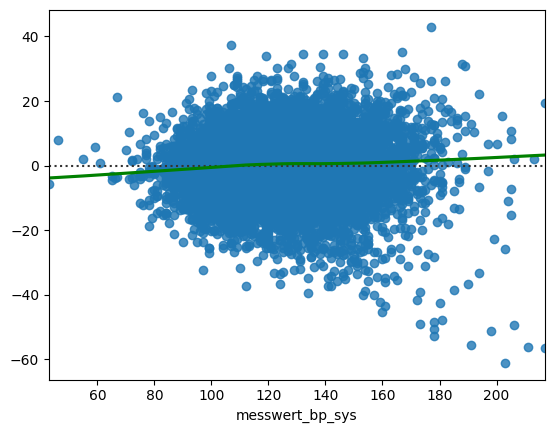

In [24]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Best Subset

In [25]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, train_results_best_sys, test_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['terminal_2', 'terminal_3a', 'terminal_3b', 'bundesland_Kärnten', 'bundesland_Niederösterreich', 'bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_dia', 'age', 'month', 'hour', 'day', 'temp', 'humidity']
Train Results:  {'r_2': 0.5358704442570588, 'adjusted_r_2': 0.5346150706518809, 'mse': 172.5931027820029}
Test Results:  {'r_2': 0.531772123873135, 'adjusted_r_2': 0.5288066453543492, 'mse': 171.29101593398462}


In [26]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     426.9
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        18:50:12   Log-Likelihood:                -41466.
No. Observations:               10381   AIC:                         8.299e+04
Df Residuals:                   10352   BIC:                         8.320e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      52.1462      2.400     21.730      0.000      47.442      56.850
terminal_2                     -3.1283      0.311    -10.059      0.000      -3.738      -2.519
terminal_3a                     0.5563      0.510      1.091      0.275      -0.443       1.555
terminal_3b                     1.7998      0.365      4.937      0.000       1.085       2.514
bundesland_Kärnten              1.1154      1.854      0.602      0.547      -2.518       4.749
bundesland_Niederösterreich     0.5168      1.655      0.312      0.755      -2.728       3.762
bundesland_Oberösterreich       1.7406      1.829      0.952      0.341      -1.844       5.325
bundesland_Salzburg            -1.4108      2.282     -0.618      0.537      -5.885       3.063
bundesland_Steiermark           0.5429      1.480      0.367      0.714      -2.358       3.443
bundesland_Tirol               -3.0778      2.361     -1.304      0.192      -7.706       1.550
bundesland_Vorarlberg          -3.1415      3.120     -1.007      0.314      -9.258       2.975
bundesland_Wien                -0.2712      1.637     -0.166      0.868      -3.480       2.938
bundesland_not_applicable       0.7364      1.778      0.414      0.679      -2.750       4.222
befinden_2                      0.5406      0.292      1.852      0.064      -0.032       1.113
befinden_3                      0.2112      0.416      0.508      0.612      -0.604       1.027
befinden_4                     -0.8399      1.178     -0.713      0.476      -3.149       1.469
befinden_5                     -0.4378      2.127     -0.206      0.837      -4.607       3.732
geschlecht_m                    1.6358      0.265      6.184      0.000       1.117       2.154
raucher_True                   -0.7263      0.360     -2.019      0.043      -1.431      -0.021
blutzucker_bekannt_True         1.0052      0.365      2.757      0.006       0.290       1.720
cholesterin_bekannt_True       -0.6275      0.338     -1.855      0.064      -1.291       0.036
in_behandlung_True              6.1073      0.413     14.804      0.000       5.299       6.916
messwert_bp_dia                 0.8448      0.009     90.377      0.000       0.827       0.863
age                             0.2358      0.009     26.015      0.000       0.218       0.254
month                           0.8988      0.092      9.815      0.000       0.719       1.078
hour                           -0.1150      0.058     -1.973      0.048      -0.229      -0.001
day                             0.1200      0.015      8.053      0.000       0.091       0.149
temp                           -0.4756      0.035    -13.619      0.000      -0.544      -0.407
humidity                       -0.1090      0.014     -7.629      0.000      -0.137      -0.081
===========

In [27]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      52.1462  &        2.400     &    21.730  &         0.000        &       47.442    &       56.850     \\
\textbf{terminal\_2}                  &      -3.1283  &        0.311     &   -10.059  &         0.000        &       -3.738    &       -2.519     \\
\textbf{terminal\_3a}                 &       0.5563  &        0.510     &     1.091  &         0.275        &       -0.443    &        1.555     \\
\textbf{terminal\_3b}                 &       1.7998  &        0.365     &     4.937  &         0.000        &        1.085    &        2.514     \\
\textbf{bundesland\_Kärnten}          &       1.1154  &        1.854     &     0.602  &         0.547        &       -2.518    &        4.749     \\
\textbf{bundesland\_Niederösterreich} &       0.5

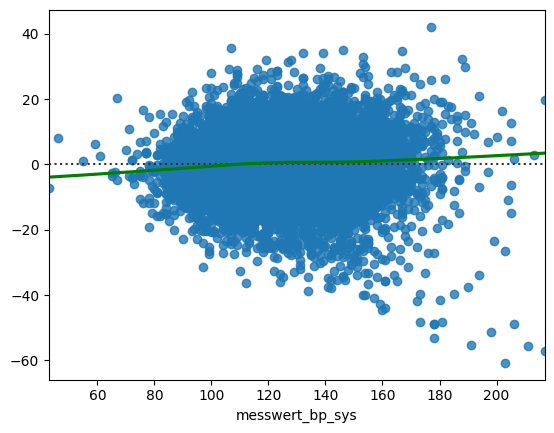

In [28]:
generate_residual_plot(Y_train_sys, model_best_sys)

In [29]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, test_results_best_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),172.012,171.427,0.537,0.531,0.536,0.528
1,LM (Best Subset),172.593,171.291,0.536,0.532,0.535,0.529


In [30]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 172.011759 & 171.426840 & 0.537434 & 0.531401 & 0.536093 & 0.528220 \\
1 & LM (Best Subset) & 172.593103 & 171.291016 & 0.535870 & 0.531772 & 0.534615 & 0.528807 \\
\bottomrule
\end{tabular}

